In [5]:
!pip install paddlepaddle paddleocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0


In [15]:
from paddleocr import PaddleOCR
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [12]:
# Khởi tạo OCR (PaddleOCR 3.0)
ocr = PaddleOCR(use_angle_cls=True, lang='vi')

/tmp/ipython-input-325910684.py:2: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(use_angle_cls=True, lang='vi')
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_mod

SÔ KÉ HOACH & DÁU TUTHÁNH PHÓ HÀ NOI (confidence: 0.91)
RE GHAN LON A IV NOAL NYOO ANIN INI AL NO (confidence: 0.47)
THÁNG LOI (confidence: 1.00)
DC: 1889 Quan Thanh - P.Quan Thänh-Q.Ba Binh - Hà Nö (confidence: 0.86)
Website: www.techcity.vn (confidence: 0.99)
DT: 04.3978 5088 (confidence: 0.98)


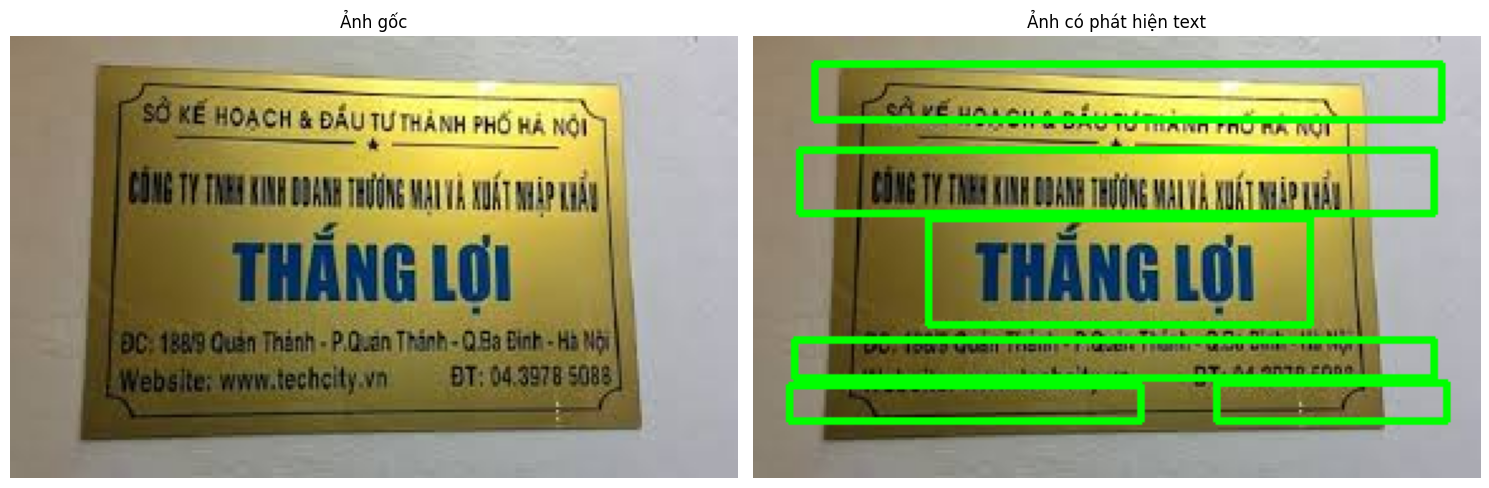

In [16]:
# Nhận diện ảnh (PaddleOCR 3.0 dùng predict)
img_path = '/content/input/ảnh biển hiệu.jpg'
result = ocr.predict(img_path)

# In kết quả
for page in result:
    texts = page['rec_texts']
    scores = page['rec_scores']

    for text, score in zip(texts, scores):
        print(f"{text} (confidence: {score:.2f})")

# Vẽ bounding boxes lên ảnh
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_detect = img_rgb.copy()

for page in result:
    polys = page['rec_polys']
    for poly in polys:
        pts = np.array(poly, dtype=np.int32)        # ép kiểu int32
        pts = pts.reshape((-1, 1, 2))               # reshape về (N,1,2)
        cv2.polylines(img_detect, [pts], True, (0, 255, 0), 2)

# Hiển thị ảnh gốc và ảnh có detection
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_detect)
plt.title('Ảnh có phát hiện text')
plt.axis('off')

plt.tight_layout()
plt.show()


=== Kết quả OCR cho ảnh: chữ viết tay 6.png ===
Birh Fp Ho Chi Mhine (confidence: 0.65)
Lhudi  (confidence: 0.48)
Tär (confidence: 0.50)
K (confidence: 0.42)


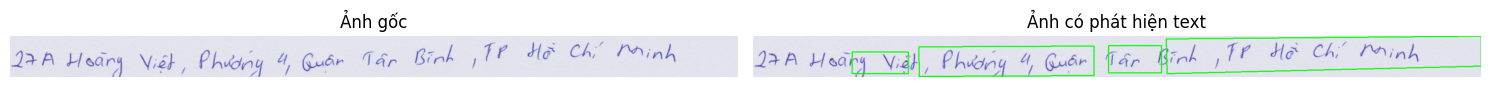


=== Kết quả OCR cho ảnh: chữ viết tay 2.png ===
289 B (confidence: 0.73)
Phdn Lb GuoBuaw 7P Ho  (confidence: 0.57)


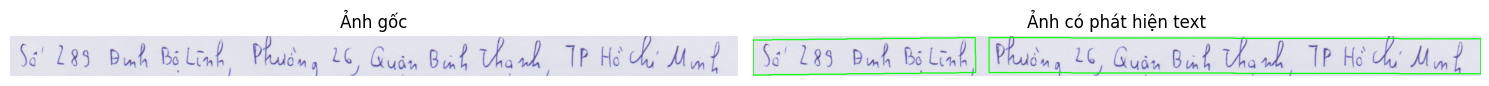


=== Kết quả OCR cho ảnh: chữ viết tay 4.png ===
Thai Binh, duan 4, (confidence: 0.66)
Däng (confidence: 0.82)
Ty Nu, udng i (confidence: 0.39)


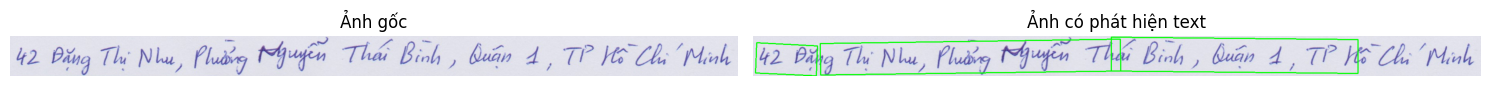


=== Kết quả OCR cho ảnh: ảnh biển hiệu.jpg ===
SÔ KÉ HOACH & DÁU TUTHÁNH PHÓ HÀ NOI (confidence: 0.91)
RE GHAN LON A IV NOAL NYOO ANIN INI AL NO (confidence: 0.47)
THÁNG LOI (confidence: 1.00)
DC: 1889 Quan Thanh - P.Quan Thänh-Q.Ba Binh - Hà Nö (confidence: 0.86)
Website: www.techcity.vn (confidence: 0.99)
DT: 04.3978 5088 (confidence: 0.98)


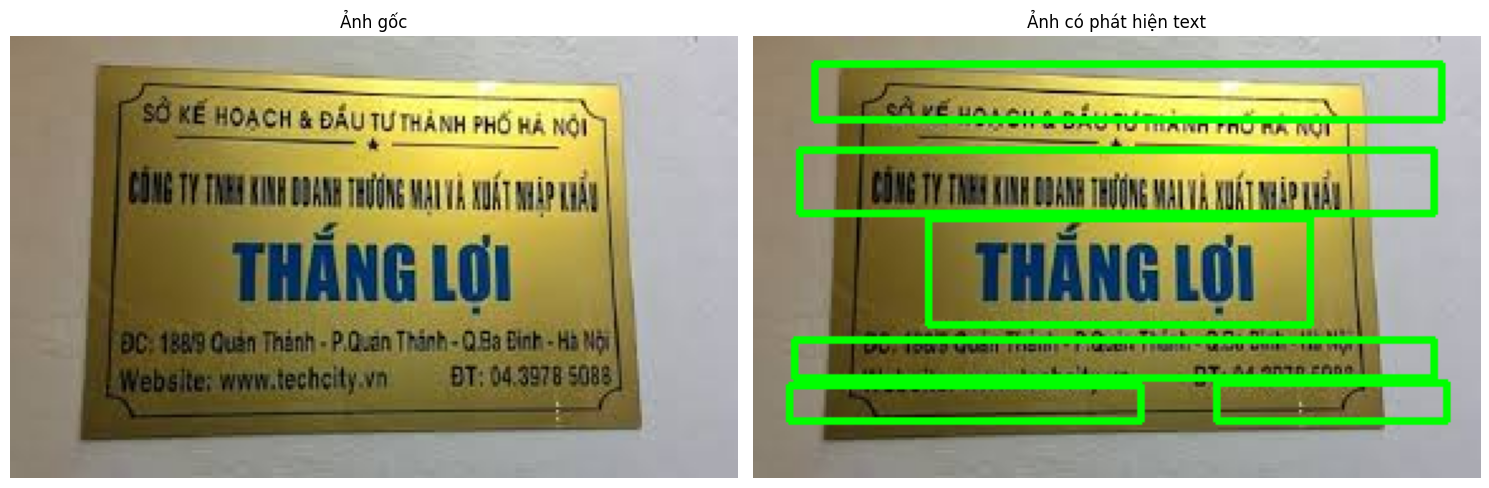


=== Kết quả OCR cho ảnh: chữ viết tay 5.png ===
hean Bin Chan ,PrinTiney m, Shenh pho a,Sho ther i (confidence: 0.54)


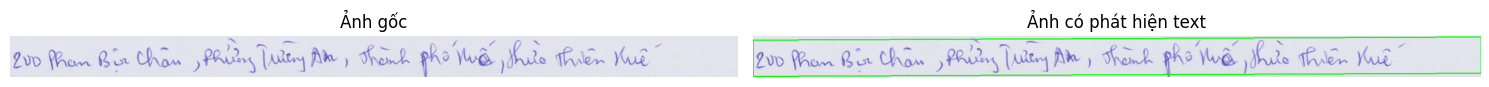


=== Kết quả OCR cho ảnh: chữ viết tay 1.png ===
hitranansah, Aunen an sach ta V (confidence: 0.59)
anW (confidence: 0.43)


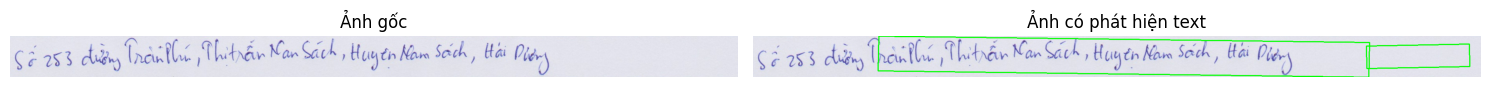


=== Kết quả OCR cho ảnh: chữ viết tay 3.png ===
2、Khn pho ^B, PrAnhu, x Tu An,Bine uh (confidence: 0.48)


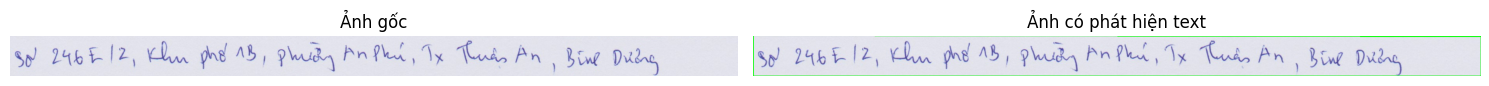


=== Kết quả OCR cho ảnh: Ảnh chữ in.png ===
éu sau mt thòi gian, nhóm vân không hoat dông t (confidence: 0.97)
p nhân nó, tim tro giúp hoc giái tán nhóm (confidence: 0.96)


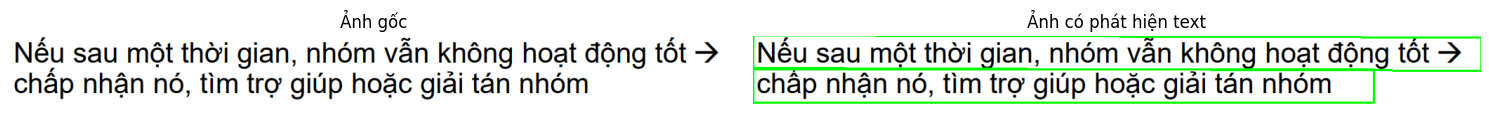

In [17]:
# Thư mục chứa ảnh
folder_path = "/content/input/"

# Lặp qua tất cả file trong thư mục
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(folder_path, filename)
        print(f"\n=== Kết quả OCR cho ảnh: {filename} ===")

        # Nhận diện ảnh
        result = ocr.predict(img_path)

        # In kết quả
        for page in result:
            texts = page['rec_texts']
            scores = page['rec_scores']

            for text, score in zip(texts, scores):
                print(f"{text} (confidence: {score:.2f})")

        # Vẽ bounding boxes lên ảnh
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_detect = img_rgb.copy()

        for page in result:
            polys = page['rec_polys']
            for poly in polys:
                pts = np.array(poly, dtype=np.int32)        # ép kiểu int32
                pts = pts.reshape((-1, 1, 2))               # reshape về (N,1,2)
                cv2.polylines(img_detect, [pts], True, (0, 255, 0), 2)

        # Hiển thị ảnh gốc và ảnh có detection
        plt.figure(figsize=(15, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(img_rgb)
        plt.title('Ảnh gốc')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(img_detect)
        plt.title('Ảnh có phát hiện text')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

### Model nhận diện không chính xác lắm kể cả khi có confidence cao